In [1]:
import os
import pandas as pd

# get the absolute path of the current working directory
cwd = os.getcwd()

# navigate to the Dataset folder
file_path = os.path.join(cwd, '..', 'Dataset', 'modified-dataset.csv')

# load the CSV file into a Pandas dataframe
data = pd.read_csv(file_path)

In [2]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

stop = set(stopwords.words('english'))

def preprocess_text(text):
    corpus=[]
    #stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in text:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        words = [''.join(c for c in s if c not in string.punctuation) for s in words if s]
        words = [word.lower() for word in words]
        words = [word for word in words if word.isalpha()]
        corpus.append(words) 

    return corpus     
      
data['processed_comment_text']= preprocess_text(data['comment_text'])

In [3]:
data.head()

,comment_text,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,other,gender,religion,race,disability,Target,processed_comment_text
0,OH yes - Were those evil Christian Missionarie...,0,0,0,1,1,0,0,0,1,0,0,1,"[yes, were, evil, christian, missionaries, man..."
1,Why is this black racist crap still on the G&M...,0,0,0,1,1,0,0,0,0,1,0,1,"[why, black, racist, crap, still, website, sto..."
2,even up here.......BLACKS!,0,0,0,1,0,0,0,0,0,1,0,1,"[even, blacks]"
3,Blame men. There's always an excuse to blame ...,0,0,0,1,0,0,0,1,0,0,0,1,"[blame, men, there, always, excuse, blame, men..."
4,And the woman exposing herself saying grab thi...,0,1,1,0,0,0,0,1,0,0,0,1,"[and, woman, exposing, saying, grab, pussy, of..."


In [4]:
#Viewing the processed text.
data['processed_comment_text']

0         [yes, were, evil, christian, missionaries, man...
1         [why, black, racist, crap, still, website, sto...
2                                            [even, blacks]
3         [blame, men, there, always, excuse, blame, men...
4         [and, woman, exposing, saying, grab, pussy, of...
                                ...                        
446846    [another, man, shamming, article, white, men, ...
446847    [matter, put, front, regarding, crime, committ...
446848    [the, democrat, party, aided, abetted, msm, fl...
446849    [nt, find, good, representation, transexual, c...
446850    [you, know, trump, fanatic, trolling, see, tru...
Name: processed_comment_text, Length: 446851, dtype: object

In [5]:
#Finding and printing the maximum length of the sentence in the processed text
lgt = []
for i in data['processed_comment_text']:
  lgt.append(len(i))
print('Maximum length of the sentence in processed text (in list) :',max(lgt))

Maximum length of the sentence in processed text (in list) : 182


In [6]:
comment_processed = []
for i in range(len(data['processed_comment_text'])):
   comment_processed.append(' '.join(wrd for wrd in data.iloc[:,13][i]))
data['comment_text_processed'] = comment_processed
data.head()

,comment_text,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,threat,other,gender,religion,race,disability,Target,processed_comment_text,comment_text_processed
0,OH yes - Were those evil Christian Missionarie...,0,0,0,1,1,0,0,0,1,0,0,1,"[yes, were, evil, christian, missionaries, man...",yes were evil christian missionaries many slau...
1,Why is this black racist crap still on the G&M...,0,0,0,1,1,0,0,0,0,1,0,1,"[why, black, racist, crap, still, website, sto...",why black racist crap still website stopped ta...
2,even up here.......BLACKS!,0,0,0,1,0,0,0,0,0,1,0,1,"[even, blacks]",even blacks
3,Blame men. There's always an excuse to blame ...,0,0,0,1,0,0,0,1,0,0,0,1,"[blame, men, there, always, excuse, blame, men...",blame men there always excuse blame men failur...
4,And the woman exposing herself saying grab thi...,0,1,1,0,0,0,0,1,0,0,0,1,"[and, woman, exposing, saying, grab, pussy, of...",and woman exposing saying grab pussy offer tak...


In [ ]:
data = data.dropna()

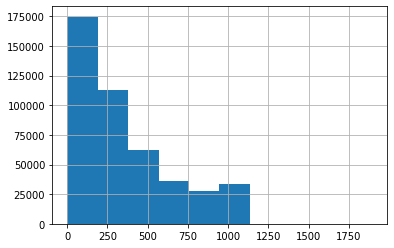

In [7]:
#Number of characters present in each sentence
data['comment_text'].str.len().hist();

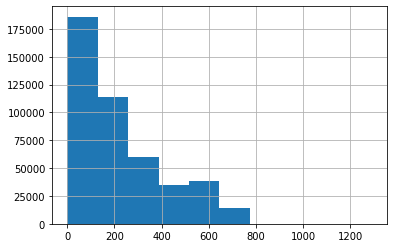

In [8]:
data['comment_text_processed'].str.len().hist();

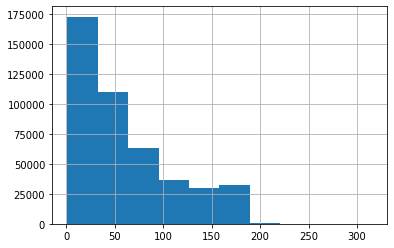

In [9]:
#Number of words appearing in each description
data['comment_text'].str.split().map(lambda x: len(x)).hist();

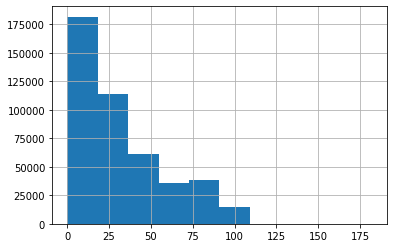

In [10]:
#Number of words appearing in each description
data['comment_text_processed'].str.split().map(lambda x: len(x)).hist();

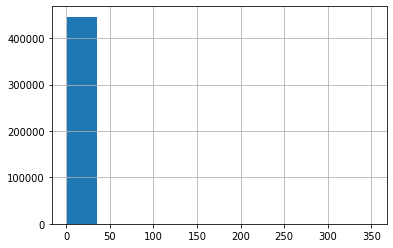

In [11]:
#Average word length
import numpy as np
data['comment_text'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist();

/home/nitron/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/nitron/.local/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


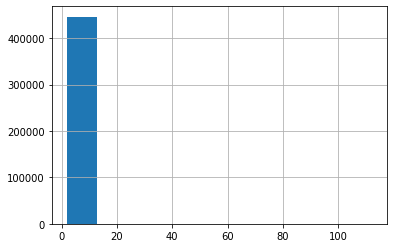

In [12]:
data['comment_text_processed'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist();

In [13]:
#N-gram analysis
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams= get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

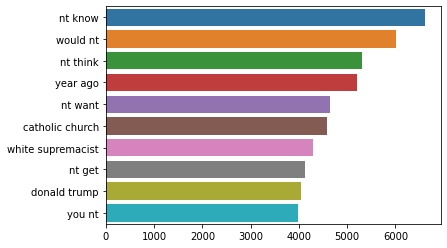

In [14]:
#Bigram analysis
plot_top_ngrams_barchart(data['comment_text_processed'],2)

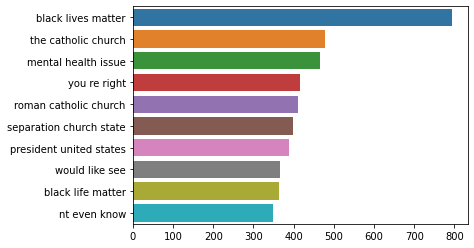

In [15]:
#Trigram analysis
plot_top_ngrams_barchart(data['comment_text_processed'],3)

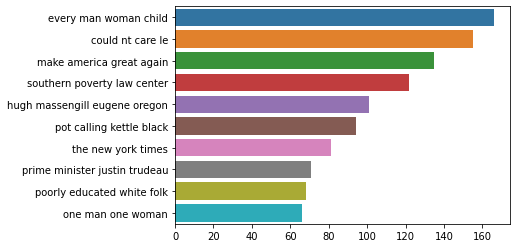

In [16]:
#For n=4
plot_top_ngrams_barchart(data['comment_text_processed'],4)

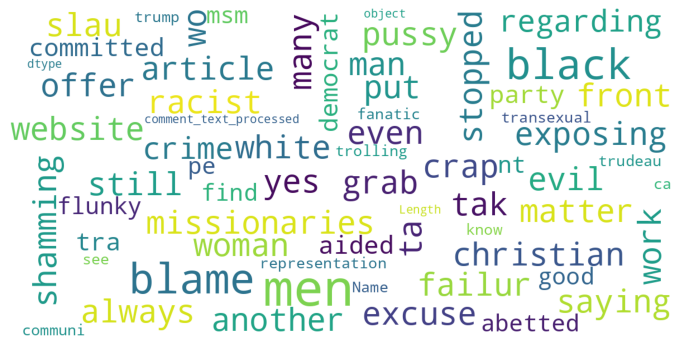

In [17]:
#Wordcloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
desc = data['comment_text_processed']
wordcloud=wordcloud.generate(str(desc))

fig = plt.figure(1, figsize=(12, 12)) 
plt.axis('off')
 
plt.imshow(wordcloud)
plt.show()

In [18]:
data.to_csv('final-dataset.csv', index=False)

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets, with 70% for training and 30% for testing
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

In [20]:
# Calculate the value counts of the 'target' column
value_counts = data['Target'].value_counts()

# Calculate the percentage of 0s and 1s
percentage_0 = (value_counts[0] / len(data)) * 100
percentage_1 = (value_counts[1] / len(data)) * 100

# Display the results
print('final-dataset')
print(f"Percentage of 0s: {percentage_0:.2f}%")
print(f"Percentage of 1s: {percentage_1:.2f}%")

final-dataset
Percentage of 0s: 88.63%
Percentage of 1s: 11.37%


In [21]:
# Calculate the value counts of the 'target' column
value_counts = train_data['Target'].value_counts()

# Calculate the percentage of 0s and 1s
percentage_0 = (value_counts[0] / len(train_data)) * 100
percentage_1 = (value_counts[1] / len(train_data)) * 100

# Display the results
print('train-dataset')
print(f"Percentage of 0s: {percentage_0:.2f}%")
print(f"Percentage of 1s: {percentage_1:.2f}%")

train-dataset
Percentage of 0s: 88.66%
Percentage of 1s: 11.34%


In [22]:
# Calculate the value counts of the 'target' column
value_counts = test_data['Target'].value_counts()

# Calculate the percentage of 0s and 1s
percentage_0 = (value_counts[0] / len(test_data)) * 100
percentage_1 = (value_counts[1] / len(test_data)) * 100

# Display the results
print('test-dataset')
print(f"Percentage of 0s: {percentage_0:.2f}%")
print(f"Percentage of 1s: {percentage_1:.2f}%")

test-dataset
Percentage of 0s: 88.57%
Percentage of 1s: 11.43%


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446851 entries, 0 to 446850
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   comment_text            446851 non-null  object
 1   severe_toxicity         446851 non-null  int64 
 2   obscene                 446851 non-null  int64 
 3   sexual_explicit         446851 non-null  int64 
 4   identity_attack         446851 non-null  int64 
 5   insult                  446851 non-null  int64 
 6   threat                  446851 non-null  int64 
 7   other                   446851 non-null  int64 
 8   gender                  446851 non-null  int64 
 9   religion                446851 non-null  int64 
 10  race                    446851 non-null  int64 
 11  disability              446851 non-null  int64 
 12  Target                  446851 non-null  int64 
 13  processed_comment_text  446851 non-null  object
 14  comment_text_processed  446851 non-n